In [48]:
import numpy as np
import pandas as pd

#Reading Training file
train = pd.read_csv("C:\\Users\\ani12\\Desktop\\AV Jobathon\\train_s3TEQDk.csv")
train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,NaN,test
351033,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,NaN,test
351034,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,NaN,test
351035,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,NaN,test


In [49]:
#Checking Missing value count
train.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [51]:
# Drop null value from Credit_Product column because it has a lot of null values
# will not drop this time
#train_new1 = train.dropna()
#train_new1.head(10)
train_new1 = train

# Categorical Feature handling

In [52]:
from sklearn.preprocessing import LabelEncoder
Gender_new = pd.get_dummies(train_new1['Gender'],)
Occupation_new = pd.get_dummies(train_new1['Occupation'])
Channel_Code_new = pd.get_dummies(train_new1['Channel_Code'])
Credit_Product_new = pd.get_dummies(train_new1['Credit_Product'])
train_new1["Region_Code"] = train_new1["Region_Code"].astype('category')
Region_Code_new = train_new1["Region_Code"].cat.codes


train_new1['Age_bin'] = pd.cut(train_new1['Age'], [0,35,60,150],labels=False)
Age_bin_dummy = pd.get_dummies(train_new1['Age_bin'])
Age_bin_dummy.columns = ['ageBelow35','ageBet35_60','ageAbove60']


train_new1['Vintage_bin'] = pd.cut(train_new1['Vintage'], [0,50,100,150],labels=False)
Vintage_bin_dummy = pd.get_dummies(train_new1['Vintage_bin'])
Vintage_bin_dummy.columns = ['vintageBelow50','vintageBet50_100','vintageAbove100']

#train_new = pd.concat([train_new1.iloc[ :, [0,2,6,8,9,10,11]], Gender_new, Region_Code_new, Credit_Product_new, Occupation_new, Channel_Code_new],axis=1)

train_new = pd.concat([train_new1.iloc[ :, [0,8,9,10,11]], Gender_new, Region_Code_new, Credit_Product_new, Occupation_new, Channel_Code_new,Age_bin_dummy,Vintage_bin_dummy],axis=1)
#train_new.info()

train_new

,ID,Avg_Account_Balance,Is_Active,Is_Lead,source,Female,Male,0,No,Yes,...,X1,X2,X3,X4,ageBelow35,ageBet35_60,ageAbove60,vintageBelow50,vintageBet50_100,vintageAbove100
0,NNVBBKZB,1045696,No,0.0,train,1,0,18,1,0,...,0,0,1,0,0,0,1,1,0,0
1,IDD62UNG,581988,No,0.0,train,1,0,27,1,0,...,1,0,0,0,1,0,0,1,0,0
2,HD3DSEMC,1484315,Yes,0.0,train,1,0,18,1,0,...,0,0,1,0,0,1,0,1,0,0
3,BF3NC7KV,470454,No,0.0,train,0,1,20,1,0,...,1,0,0,0,1,0,0,1,0,0
4,TEASRWXV,886787,No,0.0,train,1,0,32,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,4242558,Yes,NaN,test,0,1,18,0,1,...,0,1,0,0,0,1,0,0,1,0
351033,CWQ72DWS,1159153,No,NaN,test,0,1,27,0,1,...,0,1,0,0,0,1,0,0,1,0
351034,HDESC8GU,1703727,No,NaN,test,0,1,4,1,0,...,0,0,0,1,1,0,0,1,0,0
351035,2PW4SFCA,737178,Yes,NaN,test,0,1,4,1,0,...,0,0,1,0,0,1,0,0,1,0


In [53]:
train_new = train_new.rename(columns={'Female': 'Is_Female', 0:'Region_EnCode', 'No':'Credit_Product_Is_No', 'Yes':'Credit_Product_Is_Yes', 'X1':'Is_X1', 'X2':'Is_X2', 'X3':'Is_X3'})
Is_Active_new = pd.get_dummies(train_new['Is_Active'])
New_train = pd.concat([train_new.iloc[ : ], Is_Active_new],axis=1)
New_train = New_train.rename(columns={'Yes': 'Is_Active_Yes'})
New_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     351037 non-null  object 
 1   Avg_Account_Balance    351037 non-null  int64  
 2   Is_Active              351037 non-null  object 
 3   Is_Lead                245725 non-null  float64
 4   source                 351037 non-null  object 
 5   Is_Female              351037 non-null  uint8  
 6   Male                   351037 non-null  uint8  
 7   Region_EnCode          351037 non-null  int8   
 8   Credit_Product_Is_No   351037 non-null  uint8  
 9   Credit_Product_Is_Yes  351037 non-null  uint8  
 10  Entrepreneur           351037 non-null  uint8  
 11  Other                  351037 non-null  uint8  
 12  Salaried               351037 non-null  uint8  
 13  Self_Employed          351037 non-null  uint8  
 14  Is_X1                  351037 non-nu

In [54]:
train_new2 = New_train.loc[ New_train.source == "train", ['Avg_Account_Balance','Is_Female','Region_EnCode','Credit_Product_Is_No','Credit_Product_Is_Yes','Entrepreneur','Salaried','Self_Employed','Is_X1','Is_X2','Is_X3','Is_Active_Yes','ageBelow35','ageBet35_60','vintageBelow50','vintageBet50_100','Is_Lead']]
new_data = New_train.loc[ New_train.source == "test", ['ID','Avg_Account_Balance','Is_Female','Region_EnCode','Credit_Product_Is_No','Credit_Product_Is_Yes','Entrepreneur','Salaried','Self_Employed','Is_X1','Is_X2','Is_X3','Is_Active_Yes','ageBelow35','ageBet35_60','vintageBelow50','vintageBet50_100']]
train_new2.to_csv("C:\\Users\\ani12\\Desktop\\AV Jobathon\\New_Train_transformed.csv",index=False)
train_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Avg_Account_Balance    245725 non-null  int64  
 1   Is_Female              245725 non-null  uint8  
 2   Region_EnCode          245725 non-null  int8   
 3   Credit_Product_Is_No   245725 non-null  uint8  
 4   Credit_Product_Is_Yes  245725 non-null  uint8  
 5   Entrepreneur           245725 non-null  uint8  
 6   Salaried               245725 non-null  uint8  
 7   Self_Employed          245725 non-null  uint8  
 8   Is_X1                  245725 non-null  uint8  
 9   Is_X2                  245725 non-null  uint8  
 10  Is_X3                  245725 non-null  uint8  
 11  Is_Active_Yes          245725 non-null  uint8  
 12  ageBelow35             245725 non-null  uint8  
 13  ageBet35_60            245725 non-null  uint8  
 14  vintageBelow50         245725 non-nu

# Splitting Dataset in train & Test

In [55]:
from sklearn.model_selection import train_test_split
train_data = train_new2

#train_data = pd.read_csv("C:\\Users\\ani12\\Downloads\\New_Train.csv")

#y = train_data['Is_Lead']
y = train_data['Is_Lead'].astype('category')
#xs = train_new.loc[ : , train_new.columns != ('ID' and 'Is_Lead')]
x = train_data.iloc[ :, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0,stratify=y)
print("Training split input- ", x_train.shape)
print("Testing split input- ", x_test.shape)
#y_train.dtypes

Training split input-  (196580, 16)
Testing split input-  (49145, 16)


# Using Random Forest Model

In [33]:
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_curve, roc_auc_score, auc

#Defining the Random Forest algorithm
random_classifier = RandomForestClassifier()
random_classifier.fit(x_train,y_train)
print('Random Forest Classifier Created')

Random Forest Classifier Created


In [59]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 250, num = 2)]
# Number of features to consider at every split
max_features = [ 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(12, 16, num = 2)]
#max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [150, 250], 'max_features': ['sqrt'], 'max_depth': [12, 16]}


In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x,y)

C:\Users\ani12\anaconda1\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  6.8min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  8.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [12, 16],
                                        'max_features': ['sqrt'],
                                        'n_estimators': [150, 250]},
                   random_state=42, verbose=2)

In [61]:
rf_random.best_params_

{'n_estimators': 250, 'max_features': 'sqrt', 'max_depth': 12}

In [62]:
random_classifier = RandomForestClassifier(max_depth=12,n_estimators=250,max_features='sqrt')
random_classifier.fit(x,y)


RandomForestClassifier(max_depth=12, max_features='sqrt', n_estimators=250)

In [66]:
new_data.info()
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105312 entries, 245725 to 351036
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     105312 non-null  object 
 1   Avg_Account_Balance    105312 non-null  int64  
 2   Is_Female              105312 non-null  uint8  
 3   Region_EnCode          105312 non-null  int8   
 4   Credit_Product_Is_No   105312 non-null  uint8  
 5   Credit_Product_Is_Yes  105312 non-null  uint8  
 6   Entrepreneur           105312 non-null  uint8  
 7   Salaried               105312 non-null  uint8  
 8   Self_Employed          105312 non-null  uint8  
 9   Is_X1                  105312 non-null  uint8  
 10  Is_X2                  105312 non-null  uint8  
 11  Is_X3                  105312 non-null  uint8  
 12  Is_Active_Yes          105312 non-null  uint8  
 13  ageBelow35             105312 non-null  uint8  
 14  ageBet35_60            105312 n

In [71]:
new_data['Is_Lead'] = random_classifier.predict_proba(new_data.iloc[:,1:17])[:,1]
Result = new_data.loc[:,['ID','Is_Lead']]
Result.to_csv("C:\\Users\\ani12\\Desktop\\AV Jobathon\\Result_cv_transform_rf2.csv",index=False)


# Rough work not to cosider

Text(91.68, 0.5, 'predicted label')

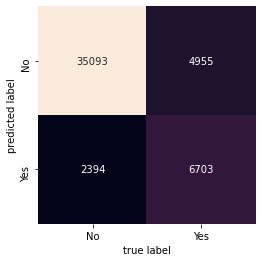

In [38]:
#Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [39]:
#get features Importances
xx= pd.Series(random_classifier.feature_importances_,index=x.columns)
xx.sort_values(ascending=False)

Avg_Account_Balance      0.228031
Credit_Product_Is_No     0.193685
Age                      0.153740
Vintage                  0.150345
Region_EnCode            0.098910
Credit_Product_Is_Yes    0.078157
Is_X1                    0.025161
Salaried                 0.021369
Is_Active_Yes            0.014544
Is_Female                0.009853
Is_X3                    0.008227
Is_X2                    0.007822
Self_Employed            0.006724
Entrepreneur             0.003430
dtype: float64

roc_auc_score for Random Forest train data:  0.999999969608856
roc_auc_score for Random Forest test data:  0.8524688387084844


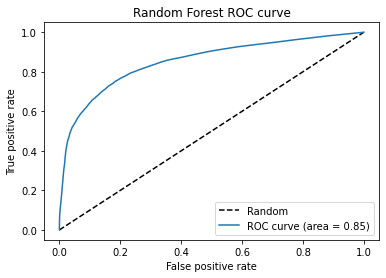

In [48]:
y_pred_proba_train=random_classifier.predict_proba(x_train)[:,1]

print('roc_auc_score for Random Forest train data: ', roc_auc_score(y_train, y_pred_proba_train))

y_pred_proba=random_classifier.predict_proba(x_test)[:,1]

print('roc_auc_score for Random Forest test data: ', roc_auc_score(y_test, y_pred_proba))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr,tpr)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc='best')

In [44]:
new_data['Is_Lead'] = random_classifier.predict_proba(new_data.iloc[:,1:])[:,1]


In [45]:
Result = new_data.loc[:,['ID','Is_Lead']]
Result

,ID,Is_Lead
245725,VBENBARO,0.00
245726,CCMEWNKY,0.90
245727,VK3KGA9M,0.01
245728,TT8RPZVC,0.02
245729,SHQZEYTZ,0.00
...,...,...
351032,DBENJOYI,0.95
351033,CWQ72DWS,0.63
351034,HDESC8GU,0.03
351035,2PW4SFCA,0.10


In [46]:
Result.to_csv("C:\\Users\\ani12\\Desktop\\AV Jobathon\\Result_rf.csv",index=False)